## Multiple Linear Regresion

### Requirement: Need to predict the diamonds price based on the independent variable using regression model. 

In this exercise we will see how the multiple independent variables will improve the model accuracy. As we have worked on simple linear regression with just one independent variable i.e. 'Carat', we will add some correlated features to reinforce the model predictions and overall performance

In [1]:
# import libraries required for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data Collection

In [2]:
# Read the csv file data from URL 
raw_dataset_url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df_diamonds=pd.read_csv(raw_dataset_url)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Preprocessing


Let's rename the columns in the dataframe

In [3]:
lcase_cols=df_diamonds.columns.to_list()
cap_cols=[col.capitalize() for col in lcase_cols]
df_diamonds.columns=cap_cols

df_diamonds.rename(columns={'X':'Length', 'Y':'Width', 'Z':'Height'}, inplace=True)
df_diamonds.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_diamonds.dtypes

Carat      float64
Cut         object
Color       object
Clarity     object
Depth      float64
Table      float64
Price        int64
Length     float64
Width      float64
Height     float64
dtype: object


Missing values check - None of the columns in the dataframe has null or NaN values.

In [5]:
df_diamonds.isnull().sum().to_frame().T  # No Null values

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height
0,0,0,0,0,0,0,0,0,0,0


#### Pearson corelation summary
Let's create a summary dataframe for pearson coefficients and p-values to select the best independent variable for the linear model

In [6]:
from scipy.stats import pearsonr

pearson_coeff=[]
pearson_pval=[]

numerical_var=df_diamonds.select_dtypes(exclude='object').columns

for col in numerical_var:
    coef_, pval_=pearsonr(df_diamonds[col], df_diamonds['Price'])
    pearson_coeff.append(coef_)
    pearson_pval.append(pval_)

df_pearson_stats=pd.DataFrame({'Coeff':pearson_coeff, 'P_val':pearson_pval}, index=numerical_var)
df_pearson_stats.round(3).sort_values(by='Coeff', ascending=False)

,Coeff,P_val
Price,1.000,0.000
Carat,0.922,0.000
Length,0.884,0.000
Width,0.865,0.000
Height,0.861,0.000
Table,0.127,0.000
Depth,-0.011,0.013



As we need other indenpendent features in addition to 'Carat' feature, we will check other categorical fields by doing futher explotary data analysis

In [344]:
# Create a heatamp to see pari-wise correlation 
def show_corr_heatmap(df_in):
    
    df_heatmap=df_in.corr()
    hmap_values=df_heatmap.round(2).values
    
    d=df_in.select_dtypes(exclude='object').shape[1]-1
    fln, fht=(d, round((d/3)*2))
    #plt.figure(figsize=(6,4))
    plt.figure(figsize=(fln,fht))
    ax=sns.heatmap(df_heatmap, annot=hmap_values, cmap='YlGnBu', linewidths=0.3)

    ## Matplotlib exising version is truncating the y-axis edges. 
    # manually adjusting the y limits
    y_min, y_max=ax.get_ylim()
    plt.ylim(y_min+0.5, y_max-0.5)

    plt.title("Feature Correlation Matrix", fontsize='14')
    plt.show()
    

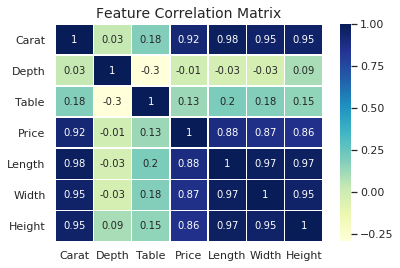

In [155]:
show_corr_heatmap(df_diamonds)

#### Data summary - include categorical variables

In [8]:
df_diamonds.describe(include='all')

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000



From the above stats summary, three categorical features i.e. Cut, Color, Clarity have less number of distinct values i.e. 5,7 & 8 respectively. We will see the how these predictor variables are correlated to dependent varaible 'Price'.
Also, we can see that there is high difference between the upper quartile and max values of 'Carat' & 'Price'. Let's see the distribution plots for both 'Carat' and 'Price'

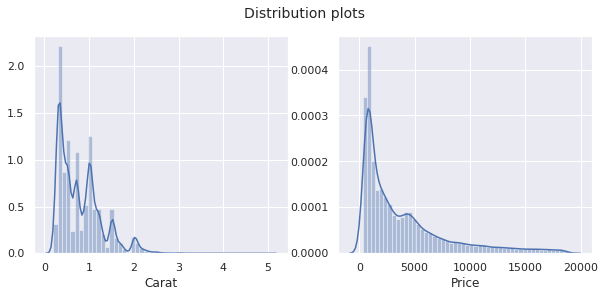

In [9]:
rows, cols=1, 2
cols_list=['Carat', 'Price']

fig, subaxes = plt.subplots(rows, cols, figsize=(10,4))
fig.suptitle("Distribution plots", fontsize=14)

for ax, col in zip(subaxes, cols_list):
    sns.distplot(df_diamonds[col], ax=ax)
    ax.set_xlabel(col)    
    
plt.show()

#### Handling Ouliers in 'Carat' feature
Since we have the outliers and it may cause an impact on the model, we are going to remove the top 1% quantile values from the dataset

In [10]:
Carat_outliers=df_diamonds['Carat'].quantile(0.99)
df_transform=df_diamonds[df_diamonds['Carat']<=Carat_outliers]

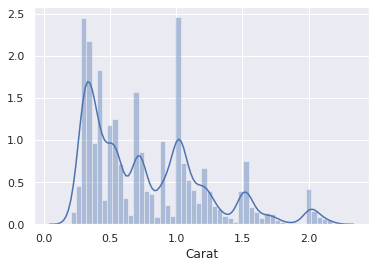

In [11]:
sns.distplot(df_transform['Carat'])
plt.show()


Now we can see the above Carat feature distribution is okay. Now let's move on to the each categorical feature and display the boxplots by group

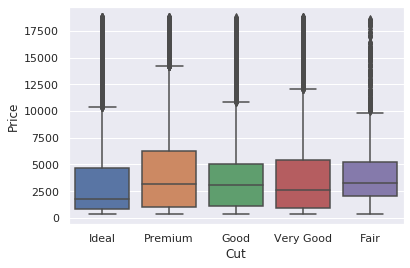

In [12]:
sns.boxplot(x=df_diamonds['Cut'], y=df_diamonds['Price'])
plt.show()

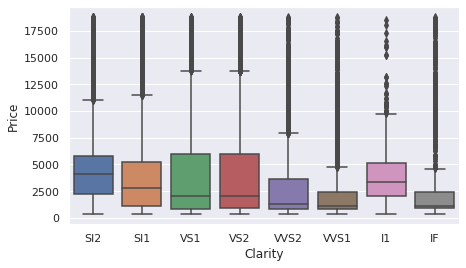

In [13]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df_diamonds['Clarity'], y=df_diamonds['Price'])
plt.show()

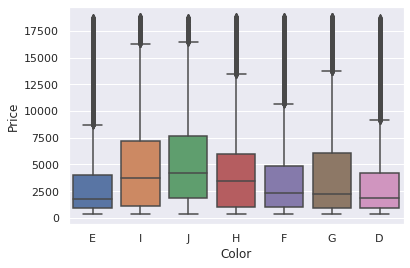

In [14]:
sns.boxplot(x=df_diamonds['Color'], y=df_diamonds['Price'])
plt.show()


After looking at the box plots, looks like these categorical varaibles do not have the significant corelation with target variable. Let's do the some math rather than relying on intution. So, we will do ANOVA test to check the catergorical variables significance role.

#### ANOVA Test

In [15]:
from scipy.stats import f_oneway

def get_f_score(i_var, d_var, grp_1, grp_2):
    df_anova_set=df_diamonds[[i_var, d_var]]
    df_grouped=df_anova_set.groupby([i_var])

    f_stat, p_val=f_oneway(df_grouped.get_group(grp_1)[d_var], df_grouped.get_group(grp_2)[d_var])
    print ("F-score: {:.2f} & p-val: {:.4f} for two groups-({},{})".format(f_stat, p_val, grp_1, grp_2))
    
get_f_score('Cut','Price','Fair','Ideal')
get_f_score('Clarity','Price','SI2','IF')
get_f_score('Color','Price','D','J')

F-score: 84.63 & p-val: 0.0000 for two groups-(Fair,Ideal)
F-score: 409.07 & p-val: 0.0000 for two groups-(SI2,IF)
F-score: 670.44 & p-val: 0.0000 for two groups-(D,J)



Well, for some groups with some difference in between them have got some good F-score with nearly 100% confidence i.e. p-value. We will use Label encoding to convert the nominal categorical variables into numerical variables

#### Label encoding for categorical features

In [319]:
df_cont_trns=df_diamonds.copy()
df_cont_trns['Cut']=df_diamonds['Cut'].astype('category').cat.codes
df_cont_trns['Clarity']=df_diamonds['Clarity'].astype('category').cat.codes
df_cont_trns['Color']=df_diamonds['Color'].astype('category').cat.codes
df_cont_trns.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


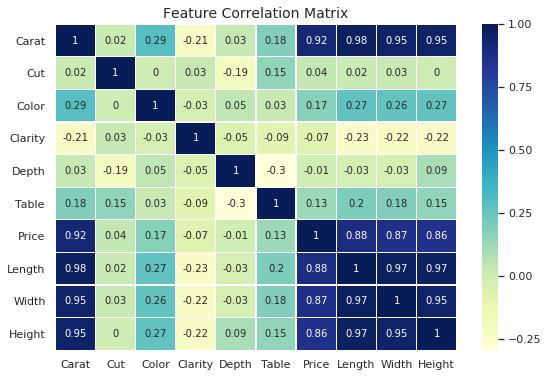

In [320]:
show_corr_heatmap(df_cont_trns)

#### Multicolinearity check

In [333]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_mc_metrics=pd.DataFrame()
mc_features=df_cont_trns[['Carat','Cut','Color','Clarity','Depth','Table']].columns

VIF=[]
for pd_col in range(df_cont_trns[mc_features].shape[1]):
    mc_stats=variance_inflation_factor(df_cont_trns[mc_features].values, pd_col)
    VIF.append(mc_stats)

df_mc_metrics['Feature']=mc_features
df_mc_metrics['VIF']=VIF
df_mc_metrics.round(2)

,Feature,VIF
0,Carat,4.50
1,Cut,7.43
2,Color,3.65
3,Clarity,6.20
4,Depth,402.12
5,Table,421.23



As expected there is a multicolinearity because of the interdependency. We will only consider the features whose variance inflation factor is less than approx 6. 

In [270]:
df_cont_trns.columns

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'Length',
       'Width', 'Height'],
      dtype='object')

In [353]:
mul_cols=['Carat', 'Cut', 'Clarity', 'Color']

X_mul=df_cont_trns[mul_cols]
y_mul=df_cont_trns['Price']
X_mul.shape, y_mul.shape

((53940, 4), (53940,))

## Mulitple Linear Regression

In [354]:
from sklearn.model_selection import train_test_split

#Let's split the 70:30 data into train and test datasets respectively
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_mul, y_mul, test_size=0.3, random_state=99)
Xm_train.shape, ym_train.shape, Xm_test.shape, ym_test.shape

((37758, 4), (37758,), (16182, 4), (16182,))


Using the training set that we have created above, we are going to train the model and we will keep the test dataset aside for now to check the model performance later for unseen data. 

In [355]:
from sklearn.linear_model import LinearRegression

mlin_reg=LinearRegression()
mlin_reg.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [356]:
df_model_coeff=pd.DataFrame(mlin_reg.coef_) 
df_model_coeff['Feature']=Xm_train.columns
print (mlin_reg.intercept_)
df_model_coeff

-3379.5109648641487


,0,Feature
0,8267.991103,Carat
1,76.406677,Cut
2,309.360254,Clarity
3,-256.368212,Color


### Model Evaluation 
Now the model is trained and ready to predict the price of diamonds for giving input values. So, let's evaluate the test dataset score

In [357]:
mtrain_score=mlin_reg.score(Xm_train, ym_train)
mtest_score=mlin_reg.score(Xm_test, ym_test)
print ("Training score:{:.2f}  Testing score:{:.2f}".format(mtrain_score, mtest_score))

Training score:0.88  Testing score:0.88


#### Residuals Distribution plot

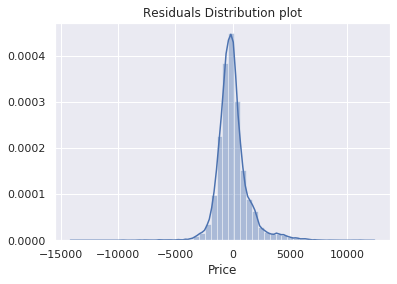

In [358]:
yhat_mlr=mlin_reg.predict(Xm_test)
sns.distplot(ym_test - yhat_mlr)
plt.title("Residuals Distribution plot")
plt.show()


From the above plot, we can see that the mean of residuals is zero which is one the assumptions for Linear regression. Now, we will do cross validation test with shuffled dataset. I've explained the reason for original data set shuffling for cross validation in SLR notebook.

In [359]:
from sklearn.model_selection import cross_val_score
Xm_, _, ym_, _ = train_test_split(X_mul, y_mul, test_size=0.0, random_state=27, shuffle=True)

cval=cross_val_score(mlin_reg, Xm_, ym_, cv=4)
print ("Cross validation scores:", cval)
print ("Average model accuracy:{:.2f}".format(np.mean(cval)))

Cross validation scores: [0.87385777 0.8730881  0.88300251 0.87950452]
Average model accuracy:0.88


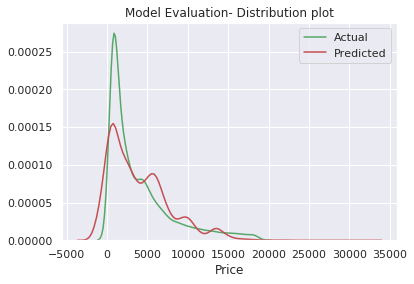

In [360]:
sns.distplot(ym_test, color='g', hist=False, label='Actual')
sns.distplot(yhat_mlr, color='r', hist=False, label='Predicted')
plt.title("Model Evaluation- Distribution plot")
plt.legend()
plt.show()


### Conclusion: 

Compared to the simple linear regression, we were able to reduce the fluctations in mid range prices, but still this MLR model is not good at extremes low and high values. Even though we have achieved 88% of overall model accuracy, model complexity is yet to be adjusted in this particular case to produce accurate results.